<a href="https://githubtocolab.com/alevant/mlcourse-Nov22/blob/main/linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [1]:
!git clone https://github.com/alevant/mlcourse-Nov22 mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


This is ice cream data  - x- independent varalbe - temp, y- sales

In [3]:
x = np.array([14.2, 16.4, 11.9, 15.2,18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2])
y = np.array([215,325,185,332,406,522,412,614,544,421,445,408])

Let's plot a scatter plot

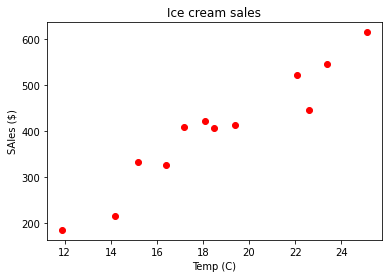

In [4]:
plt.scatter(x,y, color = 'red')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('SAles ($)')
plt.show()



Train model on the data



In [5]:
# training the simple linear regresion on trainning set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1),y)
y_predict = regressor.predict(x.reshape(-1, 1))

In [6]:
print('The parameters of the model y=ax+b are')
print(f'a={regressor.coef_[0]}')
print(f'b={regressor.intercept_}')


The parameters of the model y=ax+b are
a=30.087861794245185
b=-159.4741523408622


Plot data and the model

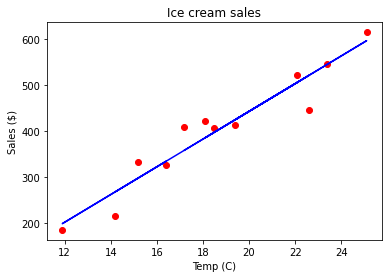

In [7]:
plt.scatter(x,y, color = 'red')
plt.plot(x,y_predict, color ='blue')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('Sales ($)')
plt.show()

Predict sales at 13 deg

In [8]:
y_predict_13 = regressor.predict([[13]])
y_predict_13

array([231.66805098])

Plot residuals

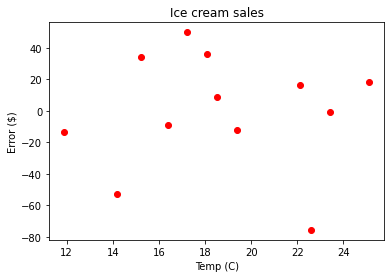

In [9]:
plt.scatter(x,y-y_predict, color = 'red')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('Error ($)')
plt.show()

Show metrics of model goodness

In [10]:
from sklearn import metrics
metrics.mean_squared_error(y, y_predict)
print("MSE: {:.4f}".format(metrics.mean_squared_error(y, y_predict)))
print("R^2: {:.4f}".format(regressor.score(x.reshape(-1, 1),y)))

MSE: 1211.3584
R^2: 0.9168


Another way to calculate linear regression model including p=value

In [12]:
from scipy import stats
slope, inter, rval, pval, se = stats.linregress(x,y)
print(f'a={slope}')
print(f'b={inter}')
print("R^2: {:.4f}".format(rval**2))
print("p-val: {:.4f}".format(pval))

a=30.087861794245196
b=-159.47415234086242
R^2: 0.9168
p-val: 0.0000


Another larger Data Set we will split data to train and test

In [13]:
df =pd.read_csv("mlcourse/data/Salary_Data.csv")

In [14]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
x=df.iloc[:,-2].values
y=df.iloc[:,-1].values

Exercise: For this example 

1.  Show scatter plot
2.  Fit the model get coef a&b
3.  Plot data and fittef model
4.  Check residuals
5.  Calculate MSE and R2

Let's separate it now to train and test to avoid overfit

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)